In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets import load_iris

In [3]:
#导入数据集

In [17]:
iris = load_iris()
X = pd.read_csv(r"C:\Users\\Tianh\Desktop\DMLab\data\Iris\iris_data.csv",header = None)
# X = iris.data[:]
print(X.shape)
X.head()

(150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [5]:
#提取数据集标签 方便后续使用

In [6]:
X_label = X.iloc[:,4]
X_label = X_label.astype(str)
X_label = np.array(X_label)
# X_label = X_label.reshape(-1,1)
# X_label = X_label.flatten()
# print(X_label)
for i in range(150):
    if X_label[i] == '1':
        X_label[i] = 'red'
    if X_label[i] == '2':
        X_label[i] = 'blue'
    if X_label[i] == '3':
        X_label[i] = 'yellow'
    if X_label[i] == '4':
        X_label[i] = 'green'
X_label

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'yellow', 'yellow',
       'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow',
       'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow',
       'yell

In [20]:
type(X.iloc[:,0:4])
X2 = np.array(X.iloc[:,0:4])
type(X2)
X[4]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
120    3
121    3
122    3
123    3
124    3
125    3
126    3
127    3
128    3
129    3
130    3
131    3
132    3
133    3
134    3
135    3
136    3
137    3
138    3
139    3
140    3
141    3
142    3
143    3
144    3
145    3
146    3
147    3
148    3
149    3
Name: 4, Length: 150, dtype: int64

In [7]:
#数据集可视化1

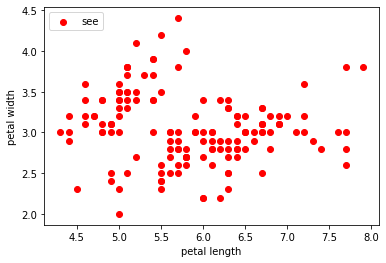

In [8]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1] ,c = "red", marker='o', label='see')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [9]:
#数据集归一化

In [10]:
def minmax_Norm(dataSet):
    minVals = dataSet.min(0) # 取每一列的最小值
    maxVals = dataSet.max(0) # 取每一列的最大值
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet/np.tile(ranges, (m, 1))   
    return normDataSet

In [11]:
X = minmax_Norm(X)

In [12]:
#数据集可视化2

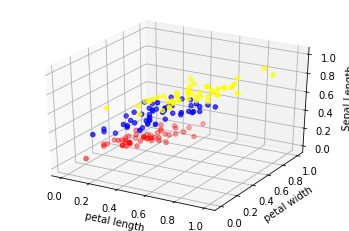

In [13]:
ax = plt.subplot(111, projection='3d')
x = np.array(X.iloc[:,0])
y = np.array(X.iloc[:,1])
z = np.array(X.iloc[:2])
ax.scatter(np.array(X.iloc[:,0]) , np.array(X.iloc[:,1]) , np.array(X.iloc[:,2]) , c = X_label)
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.set_zlabel('Sepal Length')

plt.show()

In [14]:
#尝试以数据集前两个属性进行初次聚类并观察效果

In [15]:
estimator = KMeans(n_clusters=3)#构造聚类器
estimator.fit(X)#聚类
label_pred = estimator.labels_

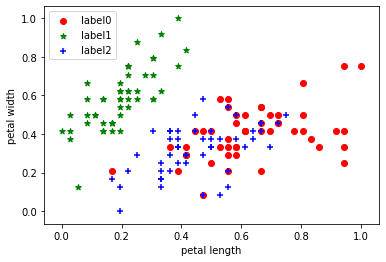

In [16]:
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0.iloc[:, 0], x0.iloc[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c = "green", marker='*', label='label1')
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], c = "blue", marker='+', label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [17]:
# 上面的聚类效果其实并不理想，尝试以数据集的最后两个特征来看下效果：
X1 = iris.data[:,2:]

In [18]:
estimator = KMeans(n_clusters=3)#构造聚类器
estimator.fit(X1)#聚类
label_pred = estimator.labels_

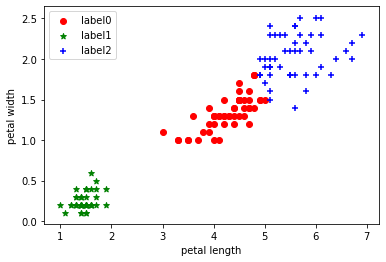

In [22]:
x0 = X1[label_pred == 0]
x1 = X1[label_pred == 1]
x2 = X1[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [ ]:
#尝试以数据集的三个特征进行聚类观察效果

In [108]:
X2 = iris.data[:,:2]

In [109]:
estimator = KMeans(n_clusters=3)#构造聚类器
estimator.fit(X2)#聚类
label_pred = estimator.labels_

In [ ]:
ax = plt.subplot(111, projection='3d')
x = np.array(X.iloc[:,0])
y = np.array(X.iloc[:,1])
z = np.array(X.iloc[:2])
ax.scatter(np.array(X.iloc[:,0]) , np.array(X.iloc[:,1]) , np.array(X.iloc[:,2]) , c = X_label)
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.set_zlabel('Sepal Length')

plt.show()

In [ ]:
ax2 = plt.subplot(111, projection='3d')
x0 = X2[label_pred == 0]
x1 = X2[label_pred == 1]
x2 = X2[label_pred == 2]
x3 = X3[label_pred == 3]
ax2.scatter(x0[:, 0], x0[:, 1], x0[:,2],c = "red", marker='o', label='label0')
ax2.scatter(x1[:, 0], x1[:, 1], x2[:,2]c = "green", marker='*', label='label1')
ax2.scatter(x2[:, 0], x2[:, 1], x3[:,2]c = "blue", marker='+', label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [22]:
#K-means聚类基本方法参考博客
# https://blog.csdn.net/zijinmu69/article/details/82708130